# Đồ án cuối kỳ

**Các thành viên:**
1. MSSV: 18120143 - Họ tên: Nguyễn Đình Hoàng Phúc
2. MSSV: 18120512 - Họ tên: Lê Đặng Thiên Phúc

---

## Import thư viện

In [1]:
!pip install ipywidgets

In [2]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
from ipywidgets import interact, fixed

## Thu thập dữ liệu

Trong đồ án lần này nhóm chúng em sử dụng bộ dữ liệu thông tin các **Ứng dụng trên Google Play Store**. <br>
Bộ dữ liệu được tạo vào 05/04/19 và cập nhật lần cuối vào 16/06/21 trên trang Kaggle, [đường dẫn](https://www.kaggle.com/gauthamp10/google-playstore-apps). Bộ dữ liệu được thu thập bằng cách crawl từ trang web của Google Play sử dụng tool Scrapy chạy trên cloud VM và có chứa nhiều thông tin liên quan đến ứng dụng như tên, kích thước, rating,...

## Khám phá dữ liệu

### Đọc dữ liệu từ file .csv vào Dataframe

In [4]:
gps_df = pd.read_csv('Google-Playstore.csv')
gps_df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


### Dữ liệu gồm bao nhiêu dòng và cột?

In [5]:
num_rows, num_cols = gps_df.shape
print('Bộ dữ liệu có {} dòng và {} cột'.format(num_rows, num_cols))

Bộ dữ liệu có 2312944 dòng và 24 cột


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng là chi tiết thông tin của một ứng dụng trên Google Play Store. Có vẻ không có dòng nào có ý nghĩa khác.

### Dữ liệu có các dòng bị lặp không?

In [6]:
duplicated_rows = gps_df.duplicated()
num_duplicated_rows = len(gps_df[duplicated_rows])
print("Có {} dòng bị lặp.".format(num_duplicated_rows))

Có 0 dòng bị lặp.


### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của tác giả về các cột trong file "Google-Playstore.csv":

- **App Name**: tên ứng dụng.
- **App Id**:  id của ứng dụng.
- **Category**: thể loại ứng dụng.
- **Rating**: chỉ số đánh giá trung bình.
- **Rating Count**: số lượt đánh giá.
- **Installs**: số lượt tải.
- **Minimum Installs**: số lượt tải tối thiểu.
- **Maximum Installs**: số lượt tải tối đa.
- **Free**: ứng dụng là mĩễn phí hay trả tiền.
- **Price**: giá ứng dụng.
- **Currency**: loại đồng tiền dùng để thanh toán.
- **Size**: kích cỡ ứng dụng
- **Minimum Android**: phiên bản android tối thiểu để chạy ứng dụng.
- **Developer Id**: ID của nhà phát triển.
- **Developer Website**: Web của nhà phát triển.
- **Developer Email**: Email của nhà phát triển.
- **Released**: Ngày phát hành của ứng dụng.
- **Last Updated**: Ngày cập nhật ứng dụng gần đây nhất.
- **Content Rating**: Đánh giá nội dung ứng dụng theo chính sách Google Play.
- **Privacy Policy**: Chính sách bảo mật.
- **Ad Supported**: Ứng dụng có quảng cáo không.
- **In app purchases**: Có thực hiện việc mua bán trong ứng dụng không.
- **Editor Choice**: Có được đánh giá chuẩn Editor Choice the Google Play không?
- **Scraped Time**: thời gian thu nhập dữ liệu (GMT)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
col_dtypes = gps_df.dtypes
col_dtypes

App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object

- Các cột `Rating`, `Rating Count`, `Minium Installs`, `Maximum Installs` `Price` có dạng numerical.
- Các cột `Free`, `Ad Supported`, `In App Purchases`, `Editors Choice` có kiểu `bool` thuộc dạng categorical.
- Các cột còn lại đều có kiểu là `object`. Do không có cảnh báo về mixed typed. Dự đoán các cột này có kiểu dữ liệu thật là `string`. Ta quan sát kỹ thêm một chút các cột này để xử lý.

#### Quan sát thêm các cột có kiểu `object`

Các hàm hỗ trợ:

In [8]:
def missing_ratio(s):
    return s.isna().mean() * 100
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.dropna().unique()

Quan sát các cột có kiểu dữ liệu `object`.

In [9]:
object_col_df = gps_df[['App Name', 'App Id', 'Category', 'Installs', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy',
       'Scraped Time']]
object_col_profiles_df = object_col_df.agg([missing_ratio, num_diff_vals, diff_vals])
object_col_profiles_df

,App Name,App Id,Category,Installs,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Scraped Time
missing_ratio,0.000086,0.0,0.0,0.004626,0.005837,0.008474,0.282324,0.001427,32.894657,0.00134,3.071972,0.0,0.0,18.199879,0.0
num_diff_vals,2177944,2312944,48,22,15,1657,154,758371,810440,950456,4158,3918,6,977743,67374
diff_vals,"[Gakondo, Ampere Battery Info, Vibook, Smart C...","[com.ishakwe.gakondo, com.webserveis.batteryin...","[Adventure, Tools, Productivity, Communication...","[10+, 5,000+, 50+, 100+, 1,000+, 500+, 50,000+...","[USD, XXX, CAD, EUR, INR, VND, GBP, BRL, KRW, ...","[10M, 2.9M, 3.7M, 1.8M, 6.2M, 46M, 2.5M, 16M, ...","[7.1 and up, 5.0 and up, 4.0.3 and up, 4.1 and...","[Jean Confident Irénée NIYIZIBYOSE, Webserveis...","[https://beniyizibyose.tk/#/, https://webserve...","[jean21101999@gmail.com, webserveis@gmail.com,...","[Feb 26, 2020, May 21, 2020, Aug 9, 2019, Sep ...","[Feb 26, 2020, May 06, 2021, Aug 19, 2019, Oct...","[Everyone, Teen, Mature 17+, Everyone 10+, Adu...","[https://beniyizibyose.tk/projects/, https://d...","[2021-06-15 20:19:35, 2021-06-15 20:19:36, 202..."


Quan sát kỹ hơn cột `Minimum Android`

In [10]:
object_col_profiles_df['Minimum Android']['diff_vals']

array(['7.1 and up', '5.0 and up', '4.0.3 and up', '4.1 and up',
       '6.0 and up', '4.4 and up', '4.0 and up', '4.2 and up',
       '2.1 and up', '7.0 and up', '2.2 and up', '2.3 and up',
       '4.3 and up', '5.1 and up', '1.6 and up', '3.0 and up',
       'Varies with device', '8.0 and up', '2.3.3 and up', '4.4W and up',
       '3.2 and up', '1.5 and up', '4.0.3 - 7.1.1', '3.1 and up',
       '2.0 and up', '1.0 and up', '1.1 and up', '2.0.1 and up',
       '4.4 - 6.0', '2.1 - 4.4', '4.0 - 5.0', '2.0 - 2.3.4', '2.2 - 4.4',
       '4.1 - 7.0', '4.1 - 6.0', '4.0 - 4.4W', '4.0 - 4.4', '4.0.3 - 7.0',
       '2.3 - 5.0', '4.0 - 7.1.1', '4.1 - 7.1.1', '4.0 - 7.0',
       '4.1 - 8.0', '4.0 - 6.0', '2.3 - 7.0', '4.0 - 8.0', '2.3 - 6.0',
       '2.1 - 2.3.4', '3.0 - 4.1.1', '2.2 - 3.0', '2.0 - 8.0',
       '4.0.3 - 8.0', '3.0 - 4.4W', '4.4 - 7.1.1', '4.4 - 8.0',
       '4.0.3 - 6.0', '1.6 - 4.0.4', '8.0', '2.3 - 5.1', '2.1 - 7.1.1',
       '2.3 - 4.4W', '4.4 - 7.0', '6.0 - 7.1.1', '2.3 - 4.

Quan sát dữ liệu và dựa và ý nghĩa, ta thấy:
- Các cột `App Name`, `App Id`, `Category`, `Currency`, `Developer Id`, `Developer Website`, `Developer Email`,`Content Rating`, `Privacy Policy`, chắc chắn được xếp vào categorical. 
- Các cột `Installs`: số lượt tải, `Size`: kích thước ứng dụng có thể được đưa sang kiểu số.
- Các cột `Released`, `Last Updated`, `Scraped Time`: có thể chuyển về datetime.
- Cột `Minimum Android` : là dữ liệu dạng khoảng, có thể tiền xử lý chia thành hai cột phiên bản hệ điều hành thấp nhất và cao nhất. Hai cột mới thêm vào có thể chuyển về dạng numerical, nhưng ta sẽ chưa chuyển vội. Sẽ tiền xử lý tiếp nếu thấy cần thiết.

#### Tiền xử lý

Ta tiền xử lý chuyển dữ liệu các cột được phân loại là numerical có kiểu object về lại kiểu số.

##### Chuyển cột `Size` sang dạng số:
Xem thử các pattern đứng sau dữ liệu số là gì:

In [11]:
set(gps_df['Size'].str.extract(r'([^\d]+)$', expand=False).values)

{'G', 'M', 'Varies with device', 'k', nan}

Ta chỉ chấp nhận các pattern string của cột `Size` có dạng là:
- Chứa chuỗi: *Varies with device*
- Kích thước dưới dạng: `{số}M` (số Megabyte của ứng dụng).
- Kích thước dưới dạng: `{số}k` (số Kilobyte của ứng dụng). 
- Kích thước dưới dạng: `{số}G` (số Gigabyte của ứng dụng). 
Đếm xem thử có bao nhiêu dòng không có dạng như vậy:

In [12]:
out_of_pattern_rows = gps_df['Size'].str.replace(',','').str.extract(r'((?:Varies with device)|(?:\d+.\d+[MGk])|(?:\d+[MGk]))', expand=False).isna()
print("Số dòng không chuyển đổi được: ", len(gps_df[out_of_pattern_rows]))
print("Các dòng không chuyển đổi được có các giá trị: ",gps_df[out_of_pattern_rows]['Size'].unique())

Số dòng không chuyển đổi được:  196
Các dòng không chuyển đổi được có các giá trị:  [nan]


Chỉ có **196** dòng lạc loài do chúng mang giá trị "nan" cũng không đáng kể.

Mặc dù ý nghĩa của 'Varies with device' và không theo pattern là khác nhau. Trong đồ án này nhóm chúng em xem hai giá trị này là tương đương nhau là không thu thập được và để giá trị `N/A` cho chúng.

In [13]:
gps_df.loc[out_of_pattern_rows,'Size'] = np.nan
gps_df.loc[gps_df['Size']=='Varies with device','Size'] = np.nan

Tách phần số của cột `Size`

In [14]:
size_nums = gps_df['Size'].str.replace(',','').str.extract(r'((?:\d+.\d+)|(?:\d+))', expand=False).astype('float64')

Các dòng có đơn vị là KB và GB cần được chuyển đổi về cùng đơn vị MB.

In [15]:
size_nums[gps_df['Size'].str[-1]=='k'] *= (1/1024)
size_nums[gps_df['Size'].str[-1]=='G'] *= 1024

Gán lại vào Dataframe chính.

In [16]:
gps_df['Size'] = size_nums

##### Chuyển cột `Installs` sang dạng số: 
Ta chỉ chấp nhận các pattern string của cột `Installs` có dạng là: số nguyên và dấu cộng "+" liền sau đó. (1000+, 1000,000+,...). Đếm xem thử có bao nhiêu dòng không có dạng như vậy:

In [17]:
out_of_pattern_rows = gps_df['Installs'].str.replace(',','').str.extract(r'((?:\d+[+]))', expand=False).isna()
print("Số dòng không chuyển đổi được: ", len(gps_df[out_of_pattern_rows]))
print("Các dòng không chuyển đổi được có các giá trị: ",gps_df[out_of_pattern_rows]['Installs'].unique())

Số dòng không chuyển đổi được:  107
Các dòng không chuyển đổi được có các giá trị:  [nan]


Chỉ có **107** dòng lạc loài, cũng không đáng kể, ta bỏ qua các dòng này và cho chúng bằng `N/A`.

In [18]:
gps_df.loc[out_of_pattern_rows,'Installs'] = np.nan

Gán lại vào Dataframe chính:

In [19]:
install_nums = gps_df['Installs'].str.replace(',','').str.extract(r'((?:\d+))', expand=False).astype('float64')
gps_df['Installs'] = install_nums

##### Chuyển các cột `Released`, `Last Updated`, `Scraped Time` sang datetime.

Làm với cột `Released` trước:

In [20]:
out_of_pattern_rows = pd.to_datetime(gps_df['Released'], format = '%b %d, %Y', errors = 'coerce').isna()
print("Số dòng không chuyển đổi được: ", len(gps_df[out_of_pattern_rows]))
print("Các dòng không chuyển đổi được có các giá trị: ",gps_df[out_of_pattern_rows]['Released'].unique())

Số dòng không chuyển đổi được:  71053
Các dòng không chuyển đổi được có các giá trị:  [nan]


Có **71035** dòng dữ liệu không chuyển được. Cũng khá nhiều nhưng đều mang giá trị `N/A` nên có thể bỏ qua

In [21]:
gps_df['Released'] = pd.to_datetime(gps_df['Released'], format = '%b %d, %Y', errors = 'coerce')

Làm với cột `Last Updated`:

In [22]:
out_of_pattern_rows = pd.to_datetime(gps_df['Last Updated'], format = '%b %d, %Y', errors = 'coerce').isna()
print("Số dòng không chuyển đổi được: ", len(gps_df[out_of_pattern_rows]))
print("Các dòng không chuyển đổi được có các giá trị: ",gps_df[out_of_pattern_rows]['Last Updated'].unique())

Số dòng không chuyển đổi được:  0
Các dòng không chuyển đổi được có các giá trị:  []


In [23]:
gps_df['Last Updated'] = pd.to_datetime(gps_df['Last Updated'], format = '%b %d, %Y', errors = 'coerce')

Làm với cột `Scraped Time`:

In [24]:
out_of_pattern_rows = pd.to_datetime(gps_df['Scraped Time'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce').isna()
print("Số dòng không chuyển đổi được: ", len(gps_df[out_of_pattern_rows]))
print("Các dòng không chuyển đổi được có các giá trị: ",gps_df[out_of_pattern_rows]['Scraped Time'].unique())

Số dòng không chuyển đổi được:  0
Các dòng không chuyển đổi được có các giá trị:  []


In [25]:
gps_df['Scraped Time'] = pd.to_datetime(gps_df['Scraped Time'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

Tới đây ta đã giải quyết xong một số cột có dữ liệu `numerical` cần thiết. <br>
##### Kiểm tra xem dữ liệu `numerical` đã hợp lý chưa?

In [26]:
numerical_col_df = gps_df[['Rating', 'Rating Count', 'Installs', 'Size' ,'Minimum Installs', 'Maximum Installs', 'Price', 'Released', 'Last Updated', 'Scraped Time']]
numerical_col_profiles_df = numerical_col_df.agg([missing_ratio, pd.Series.min, pd.Series.max])
numerical_col_profiles_df

,Rating,Rating Count,Installs,Size,Minimum Installs,Maximum Installs,Price,Released,Last Updated,Scraped Time
missing_ratio,0.989345,9.893452e-01,4.626139e-03,3.241453,4.626139e-03,0.000000e+00,0.0,3.071972,0.0,0.0
min,0.000000,0.000000e+00,0.000000e+00,0.003125,0.000000e+00,0.000000e+00,0.0,2010-01-28 00:00:00,2009-02-09 00:00:00,2021-06-15 20:19:35
max,5.000000,1.385576e+08,1.000000e+10,1536.000000,1.000000e+10,1.205763e+10,400.0,2021-06-16 00:00:00,2021-06-16 00:00:00,2021-06-16 15:10:42


Ba cột, `Installs`, `Minimum Installs`, và `Maximum Installs` được mô tả trong bộ dữ liệu không rõ ràng. Chúng em đã tìm thêm trên Internet nhưng chưa được kết quả mong muốn. Mà theo kết quả bên trên thì cột `Installs` và `Minimum Installs` có vẻ giống nhau về các tính chất. Nên ta sẽ quan sát thêm một chút ba cột này.

Kiểm tra hai cột `Installs` và `Minimum Installs` có giống nhau không?

In [27]:
is_same = ((gps_df['Installs'] == gps_df['Minimum Installs']) | (gps_df['Installs'].isna() & gps_df['Minimum Installs'].isna())).all()
print("Hai cột giống nhau: {}".format(is_same))

Hai cột giống nhau: True


Xem thử các giá trị của `Installs`:

In [28]:
gps_df['Installs'].unique()

array([1.e+01, 5.e+03, 5.e+01, 1.e+02, 1.e+03, 5.e+02, 5.e+04, 1.e+04,
       1.e+00, 5.e+05, 1.e+05, 5.e+00, 1.e+07, 1.e+06, 5.e+06, 0.e+00,
       1.e+08,    nan, 5.e+07, 1.e+09, 5.e+08, 5.e+09, 1.e+10])

Từ đây, nhóm em dự đoán khá chắc chắn là cột `Installs` thuộc dạng `categorical` cho biết mốc số lượt tải của ứng dụng. Cột `Minimum Installs` chỉ là cột `Installs` được tách ra dưới dạng số. Từ đây ta sẽ phân hai cột `Installs` và `Minumum Installs` vào dạng `categorical`.

Kiểm tra lại cột `Maximum Installs`:

In [29]:
print("Cột \"Maximum Installs\" có {} giá trị khác nhau.".format(gps_df['Maximum Installs'].nunique()))
print("Các giá trị: ", gps_df['Maximum Installs'].unique())

Cột "Maximum Installs" có 251563 giá trị khác nhau.
Các giá trị:  [     15    7662      58 ...  590469 7274660  814548]


Có thể cho rằng cột `Maximum Installs` là số lượt tải mà Google Play đã ghi nhận cho ứng dụng.

Tới đây nhóm chưa thấy thêm điểm gì bất thường. Ta sẽ tiếp tục xử lý cho các cột khác!

##### Tách cột `Minimum Android` thành 2 cột là Min Android Ver và Max Android Ver

In [30]:
android_ver_pattern_1 = gps_df['Minimum Android'].str.extract(r'((?:\d.\d.\d)|(?:\d.\d))', expand = False)
android_ver_pattern_2 = gps_df['Minimum Android'].str.extract(r'((?<=\- ).*)', expand=False)

In [31]:
gps_df['Min Android Ver'] = android_ver_pattern_1

In [32]:
gps_df['Max Android Ver'] = android_ver_pattern_2

Tới đây ta đã giải quyết xong một số cột có dữ liệu `categorical` cần thiết. 
##### Kiểm tra xem dữ liệu `categorical` đã hợp lý chưa?

In [33]:
categorical_col_df = gps_df[['App Name', 'App Id','Installs', 'Minimum Installs', 'Category', 'Currency',
                             'Minimum Android', 'Min Android Ver', 'Max Android Ver', 'Developer Id', 'Developer Website',
                             'Developer Email', 'Content Rating',
                             'Privacy Policy', 'Free', 'Ad Supported', 'In App Purchases', 'Editors Choice']]
categorical_col_profiles_df = categorical_col_df.agg([missing_ratio, num_diff_vals, diff_vals])
categorical_col_profiles_df

,App Name,App Id,Installs,Minimum Installs,Category,Currency,Minimum Android,Min Android Ver,Max Android Ver,Developer Id,Developer Website,Developer Email,Content Rating,Privacy Policy,Free,Ad Supported,In App Purchases,Editors Choice
missing_ratio,0.000086,0.0,0.004626,0.004626,0.0,0.005837,0.282324,2.280384,99.980415,0.001427,32.894657,0.00134,0.0,18.199879,0.0,0.0,0.0,0.0
num_diff_vals,2177944,2312944,22,22,48,15,154,25,18,758371,810440,950456,6,977743,2,2,2,2
diff_vals,"[Gakondo, Ampere Battery Info, Vibook, Smart C...","[com.ishakwe.gakondo, com.webserveis.batteryin...","[10.0, 5000.0, 50.0, 100.0, 1000.0, 500.0, 500...","[10.0, 5000.0, 50.0, 100.0, 1000.0, 500.0, 500...","[Adventure, Tools, Productivity, Communication...","[USD, XXX, CAD, EUR, INR, VND, GBP, BRL, KRW, ...","[7.1 and up, 5.0 and up, 4.0.3 and up, 4.1 and...","[7.1, 5.0, 4.0.3, 4.1, 6.0, 4.4, 4.0, 4.2, 2.1...","[7.1.1, 6.0, 4.4, 5.0, 2.3.4, 7.0, 4.4W, 8.0, ...","[Jean Confident Irénée NIYIZIBYOSE, Webserveis...","[https://beniyizibyose.tk/#/, https://webserve...","[jean21101999@gmail.com, webserveis@gmail.com,...","[Everyone, Teen, Mature 17+, Everyone 10+, Adu...","[https://beniyizibyose.tk/projects/, https://d...","[True, False]","[False, True]","[False, True]","[False, True]"


Quan sát kỹ hơn 4 cột `Category`, `Currency` và `Content Rating`

In [34]:
categorical_col_profiles_df['Category']['diff_vals']

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [35]:
categorical_col_profiles_df['Currency']['diff_vals']

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [36]:
categorical_col_profiles_df['Content Rating']['diff_vals']

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

Cột currency có giá trị "XXX" mang ý nghĩa là "No currency" (theo Wikipedia). Còn lại chưa có gì đáng chú ý hay bất thường.

## Đưa ra các câu hỏi có ý nghĩa cần trả lời

1. Thường các app được đưa ra vào tháng nào trong năm?
2. Các công ty có nhiều lượt tải nhất thì app chủ yếu chủ đề gì?
3. Có phải càng gần đây app càng nặng?
4. Xu hướng app theo free hay tính phí?

## Phân tích dữ liệu để trả lời các câu hỏi trên

### 1. Thường các ứng dụng được đưa ra thị trường vào tháng nào trong năm?
Trả lời được câu hỏi này có thể cho biết xu hướng phát hành của các nhà phát hành ứng dụng, liệu họ có một "mùa phát hành" nào đó riêng hay không. Đối với nhà sản xuất ứng dụng họ có thể tính toán thời điểm để đưa ứng dụng ra ngoài, chạy các chiến lược quảng cáo, khuyến mãi hợp lý. Người dùng cũng có thể dựa vào thông tin này để tìm kiếm, dùng thử những ứng dụng mới.

Với câu hỏi này nhóm sẽ phân tích và quan sát dữ liệu theo 3 cách:
- Tổng số app được đưa ra thị trường mỗi tháng qua từng năm.
- Trung bình tổng số app được đưa ra thị trường trong từng tháng trong tất cả các năm trong bộ dữ liệu
- Trung bình số tổng app được đưa ra thị trường trong từng tháng qua tất cả các năm của một số category nổi bật nhất.

Trước khi trả lời các câu hỏi, nhóm sẽ tiền xử lý qua các bước:
- Bước 1: Thêm 2 cột Month_Released và Year_Released vào gps_df
- Bước 2: Kiểm tra số mẫu dữ liệu từng năm và xử lý để đảm bảo không có sự mất cân bằng.
- Bước 3: Quan sát phân bố của thông tin "Số lượt tải" trong ứng dụng.

#### Tiền xử lý

**Bước 1**: Thêm cột `Month_Released` (tháng xuất bản) và `Year_Released` (năm xuất bản) vào bảng.

In [37]:
gps_df['Month_Released'] = gps_df['Released'].dt.month
gps_df['Year_Released'] = gps_df['Released'].dt.year

**Bước 2**: Kiểm tra thêm số mẫu dữ liệu của từng năm để không có sự mất cân bằng khi so sánh.

Thời điểm nhỏ nhất: 2010-01-28 00:00:00
Thời điểm lớn nhất: 2021-06-16 00:00:00
Thống kê số mẫu dữ liệu từng năm: 
AxesSubplot(0.125,0.125;0.775x0.755)


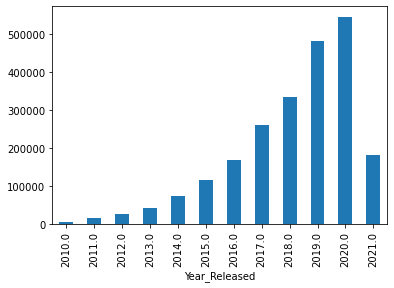

In [38]:
print("Thời điểm nhỏ nhất:",gps_df['Released'].min())
print("Thời điểm lớn nhất:",gps_df['Released'].max())
apps_by_year = gps_df.groupby(['Year_Released'])['Year_Released'].count()
print("Thống kê số mẫu dữ liệu từng năm: ")
print(apps_by_year.plot.bar())

Dễ thấy dữ liệu thu thập được trong năm 2021 chưa đầy đủ (chỉ mới đến tháng 06) còn ở năm 2010 dữ liệu được thu thập từ cuối tháng 1. Do đó, để phân tích được công bằng, ta sẽ bỏ đi dữ liệu năm 2010 và 2021.  

In [39]:
min_year = gps_df['Year_Released'].min()
max_year = gps_df['Year_Released'].max()
print("Năm nhỏ nhất: ", min_year)
print("Năm lón nhất:", max_year)

Năm nhỏ nhất:  2010.0
Năm lón nhất: 2021.0


In [40]:
app_released_df = gps_df[~gps_df['Year_Released'].isin([min_year,max_year])]

**Bước 3**: Theo như thực tế thì có thể có nhiều app được tung ra nhưng có rất ít người sử dụng, có vẻ việc phân tích dữ liệu của các ứng dụng này không mang ý nghĩa lắm. Thử quan sát phân vị của cột `Maximum Installs`.

In [41]:
app_released_df['Maximum Installs'].quantile(np.arange(0.1,1,0.1))

0.1       20.0
0.2       63.0
0.3      156.0
0.4      356.0
0.5      814.0
0.6     1920.0
0.7     4948.0
0.8    15141.0
0.9    71438.0
Name: Maximum Installs, dtype: float64

Có thể thấy hơn 50% ứng dụng chỉ có khoảng 1000 lượt tải. Do đó trong các đồ thị ở bước phân tích sau đây, nhóm sử dụng biến số `num_installs_threshold` để thể hiện việc chỉ xét những ứng dụng có hơn `num_installs_threshold` lượt tải.

#### Phân tích dữ liệu
Để trả lời câu hỏi này thì nhóm sẽ thực hiện theo từng bước:
- Bước 1: Phân tích số app được đưa ra thị trường từng tháng qua mỗi năm:
- Bước 2: Phân tích trung bình tổng số app được đưa ra thị trường trong từng tháng qua các năm trong bộ dữ liệu.
- Bước 3: Trung bình tổng số app được đưa ra thị trường trong từng tháng qua các năm của một số category nổi bật nhất.

**Bước 1:** Tổng số app được đưa ra thị trường mỗi tháng ở mỗi năm. <br>
Để tính toán giá trị này ta sẽ gom nhóm bảng dữ liệu theo `Month_Released` và `Year_Released` rồi tính số lượng.

In [42]:
def draw_num_released_each_month(app_released_df,num_installs_threshold = 1000):
    app_released_df = app_released_df[app_released_df['Maximum Installs']>num_installs_threshold]
    num_released_each_month_df = app_released_df.groupby(['Month_Released','Year_Released']).size().unstack(1)
    num_released_each_month_df.plot.line(marker='o',xlabel ='Month', ylabel ='App Released', figsize=(24,10))

Vẽ biểu đồ minh họa, thanh trượt dùng để chọn ngưỡng cho `Maximum Installs`, những ứng dụng có `Maximum Installs` lớn hơn ngưỡng mới được xét.

In [43]:
threshold_range= (app_released_df['Maximum Installs'].min(),app_released_df['Maximum Installs'].quantile(0.8))
interact(draw_num_released_each_month,num_installs_threshold = threshold_range, app_released_df = fixed(app_released_df));

interactive(children=(FloatSlider(value=1000.0, description='num_installs_threshold', max=15141.0), Output()),…

**Bước 2:** Trung bình tổng số app được đưa ra thị trường trong mỗi tháng trong tất cả các năm trong bộ dữ liệu. <br>
Để tính toán giá trị này ta sẽ gom nhóm bảng dữ liệu theo `Month_Released` và `Year_Released` rồi tính số lượng. Sau đó lấy trung bình qua các năm.

In [44]:
def draw_average_num_released_each_month(app_released_df,num_installs_threshold=1000):
    app_released_df = app_released_df[app_released_df['Maximum Installs']>num_installs_threshold]
    average_num_released_each_month = app_released_df.groupby(['Month_Released','Year_Released']).size().unstack(1).mean(axis = 1)
    average_num_released_each_month.plot.bar()

Vẽ biểu đồ minh họa, thanh trượt dùng để chọn ngưỡng cho `Maximum Installs`, những ứng dụng có `Maximum Installs` lớn hơn ngưỡng mới được xét.

In [45]:
threshold_range= (app_released_df['Maximum Installs'].min(),app_released_df['Maximum Installs'].quantile(0.8))
interact(draw_average_num_released_each_month,num_installs_threshold = threshold_range, app_released_df = fixed(app_released_df));

interactive(children=(FloatSlider(value=1000.0, description='num_installs_threshold', max=15141.0), Output()),…

**Bước 3:** Trung bình tổng số app được đưa ra thị trường trong từng tháng qua mỗi năm của một số category nổi bật nhất.
Để tính toán giá trị này ta sẽ :
- Xác định 10 categories nổi bật nhất.
- Gom nhóm bảng dữ liệu theo Month_Released Category và Year_Released rồi tính số lượng. Sau đó lấy trung bình qua các năm.

**Xác định 10 categories nổi bật nhất** 

Ở đây categories nổi bật nhất chúng em xem là categories có nhiều ứng dụng thuộc về nhất.

In [46]:
popular_categories = app_released_df.groupby('Category').size().sort_values(ascending = False).index.to_list()[:10]
print("Các Category có nhiều ứng dụng nhất: ",popular_categories)

Các Category có nhiều ứng dụng nhất:  ['Education', 'Music & Audio', 'Business', 'Tools', 'Entertainment', 'Lifestyle', 'Books & Reference', 'Personalization', 'Health & Fitness', 'Productivity']


**Tính toán và vẽ đồ thị**

In [47]:
def draw_average_num_released_each_month_by_categories(app_released_df,num_installs_threshold = 1000):
    app_released_df = app_released_df[app_released_df['Maximum Installs']>num_installs_threshold]
    average_num_released_each_month_by_categories = app_released_df[app_released_df['Category'].isin(popular_categories)].groupby(['Month_Released','Category','Year_Released']).size().unstack(2).mean(axis = 1).unstack(1)
    average_num_released_each_month_by_categories.plot.line(marker='o',xlabel ='Month', ylabel ='App Released', figsize=(24,10))

In [48]:
threshold_range= (app_released_df['Maximum Installs'].min(),app_released_df['Maximum Installs'].quantile(0.8))
interact(draw_average_num_released_each_month_by_categories,num_installs_threshold = threshold_range, app_released_df = fixed(app_released_df));

interactive(children=(FloatSlider(value=1000.0, description='num_installs_threshold', max=15141.0), Output()),…

#### Nhận xét
Có vẻ như không có xu hướng gì rõ ràng. Nhưng nhìn chung thì có vẻ ở đa số các tháng đầu năm, số lượng ứng dụng được tung ra ít hơn so với các tháng còn lại. Chúng em giả thuyết rằng cuối năm là dịp lễ và nghỉ lễ lớn ở đa số các quốc gia phát triển mạnh về công nghệ thông tin (Giáng Sinh, Tết Tây). Do đó việc ra mắt ứng dụng đầu năm ngay sau kì nghỉ có thể sẽ khá nguy hiểm khi nhân viên chưa quen lại với công việc, khó sửa chửa bảo trì sản phẩm ngay khi mới ra mắt.

### 2. Các công ty có nhiều lượt tải nhất thì app chủ yếu chủ đề gì? 
Trả lời được câu hỏi này cho ta biết các tập đoàn công nghệ phổ biến, được nhiều người tin dùng đang tập trung vào mảng ứng dụng nào.

Trong câu hỏi này không cần phải tiền xử lý thêm dữ liệu. Để trả lời câu hỏi này thì nhóm sẽ thực hiện theo các bước:
- Bước 1: Rút trích ra các công ty có tổng lượt tải của các ứng dụng của công ty họ là nhiều nhất, lưu và list `top_companies`.
- Bước 2: Thống kê xem các ứng dụng của `top_companies` thuộc về những `Category` nào.
- Bước 3: Quan sát biểu đồ và nhận xét.

#### Phân tích dữ liệu

**Bước 1**: Rút trích ra các công ty có tổng lượt tải của các ứng dụng của công ty họ là nhiều nhất, lưu và list `top_companies`.

In [49]:
top_limits = 10
top_companies = gps_df[['Developer Id', 'Maximum Installs']].groupby('Developer Id').sum().sort_values(ascending = False, by = 'Maximum Installs')[:top_limits].index.to_list()
print("Các công ty có nhiều lượt tải: ", top_companies)

Các công ty có nhiều lượt tải:  ['Google LLC', 'Samsung Electronics Co.,  Ltd.', 'Facebook', 'Microsoft Corporation', 'WhatsApp LLC', 'Outfit7 Limited', 'Xiaomi Inc.', 'Motorola Mobility LLC.', 'Instagram', 'Huawei Internet Services']


Có thể thấy toàn những tập đoàn lớn như: Google, Facebook,...

**Bước 2**: Thống kê xem các ứng dụng của `top_companies` thuộc về những `Category` nào.

In [50]:
categories_of_giants = gps_df[gps_df['Developer Id'].isin(top_companies)].groupby('Category').size().sort_values(ascending = False)
categories_of_giants

Category
Tools                      152
Business                    55
Productivity                52
Entertainment               39
Communication               35
Photography                 32
Education                   16
Music & Audio               14
Personalization             12
Lifestyle                   12
Social                       9
Casual                       8
Video Players & Editors      8
Action                       6
Finance                      6
Travel & Local               5
Health & Fitness             4
Books & Reference            3
Art & Design                 3
Arcade                       2
Libraries & Demo             2
News & Magazines             2
Weather                      2
Auto & Vehicles              2
Puzzle                       2
Sports                       1
Medical                      1
Shopping                     1
Racing                       1
Parenting                    1
Maps & Navigation            1
Educational                  1

**Bước 3**: Quan sát biểu đồ và nhận xét. Thanh trượt `top_limits` để điều chỉnh số lượng công ty mà ta xét.

In [51]:
TOP_COMPANIES = gps_df[['Developer Id', 'Maximum Installs']].groupby('Developer Id').sum().sort_values(ascending = False, by = 'Maximum Installs')[:100].index.to_list()
def draw_categories_of_giants(gps_df, top_limits = 10):
    top_companies = TOP_COMPANIES[:top_limits]
    print("Các công ty có nhiều lượt tải: ", top_companies)
    categories_of_giants = gps_df[gps_df['Developer Id'].isin(top_companies)].groupby('Category').size().sort_values(ascending = False)
    categories_of_giants.plot.bar(figsize=(12,5))

In [52]:
interact(draw_categories_of_giants, gps_df = fixed(gps_df), top_limits = (10,100))

interactive(children=(IntSlider(value=10, description='top_limits', min=10), Output()), _dom_classes=('widget-…

<function __main__.draw_categories_of_giants(gps_df, top_limits=10)>

#### Nhận xét
Có thể thấy chuyên mục `Tools` luôn đứng đầu danh sách. Ta xem thử một vài ứng dụng thuộc `Category` này.

In [53]:
gps_df[gps_df['Category'] == 'Tools'].sort_values(ascending = False, by = 'Maximum Installs')[:20][['App Name','Maximum Installs', 'Developer Id']]

,App Name,Maximum Installs,Developer Id
2155096,Google Play services,12057627016,Google LLC
1773294,Google,9154248491,Google LLC
1060335,Google Text-to-Speech,9034404884,Google LLC
2011395,Android Accessibility Suite,7408134567,Google LLC
1429623,Android System WebView,4764329349,Google LLC
1366575,Gboard - the Google Keyboard,3897822063,Google LLC
1085721,Samsung My Files,2063336389,"Samsung Electronics Co., Ltd."
337866,Samsung Experience Service,1682763021,"Samsung Electronics Co., Ltd."
786925,Device Care,1681485812,"Samsung Electronics Co., Ltd."
731501,SHAREit - Transfer & Share,1666016612,Smart Media4U Technology Pte.Ltd.


Có thể thấy chúng đều là những ứng dụng được cài đặt sẵn trên điện thoại Android do công ty xuất bản hệ điều hành là "Google" cài sẵn hoặc do nhà sản xuất điện thoại như "Samsung", "Xiaomi" cài sẵn.

Quan sát thêm một số chủ đề nổi bật khác như `Educational` và `Arcade`.

In [54]:
gps_df[gps_df['Category'] == 'Educational'].sort_values(ascending = False, by = 'Maximum Installs')[:20][['App Name','Maximum Installs', 'Developer Id']]

,App Name,Maximum Installs,Developer Id
336867,Toca Kitchen 2,153769168,Toca Boca
2144949,Masha and the Bear. Educational Games,123688272,AppQuiz
388316,"Truck games for kids - build a house, car wash",114808798,GoKids!
725710,Baby Panda's Supermarket,108975090,BabyBus
974924,Coloring & Learn,81165199,Orange Studios Games
312969,Baby Panda's Fashion Dress Up Game,76954454,BabyBus
1999958,Monster Trucks Game for Kids 2,71857875,Raz Games
204518,Baby Panda World,70957986,BabyBus
455437,Little Panda Policeman,64859926,BabyBus
428072,Cooking Mama: Let's cook!,63660606,Office Create Corp.


In [55]:
gps_df[gps_df['Category'] == 'Arcade'].sort_values(ascending = False, by = 'Maximum Installs')[:20][['App Name','Maximum Installs', 'Developer Id']]

,App Name,Maximum Installs,Developer Id
787700,Subway Surfers,1704495994,SYBO Games
981879,Temple Run,625467333,Imangi Studios
2165629,Fruit Ninja®,500306392,Halfbrick Studios
1379727,Angry Birds Classic,445623595,Rovio Entertainment Corporation
719155,Zombie Tsunami,395942266,Mobigame S.A.R.L.
316977,Hungry Shark Evolution - Offline survival game,390613416,Ubisoft Entertainment
1494216,Sonic Dash - Endless Running & Racing Game,321167025,SEGA
519139,Geometry Dash Lite,302542035,RobTop Games
995992,Subway Princess Runner,295529945,Ivy
1584618,Stack Ball - Blast through platforms,292452121,CASUAL AZUR GAMES


Có thể thấy đây đều là những ứng dụng rất quen thuộc như "Toca Kitchen 2", "Subway Surfers", "Temple Run",... Có thể thấy thể loại chính mà các nhà phát triển lớn đang sở hữu là "Educational" và "Acrade" bên cạnh các ứng dụng thể loại "Tools" thường được cài mặc định trên máy.

### 3. Có phải càng gần đây app càng nặng.
Khi trả lời được câu hỏi này:
- Đối với nhà phát triển app mobile, trả lời câu hỏi này cho chúng ta biết được kích cỡ phù hợp cho ứng dụng của mình khi đưa lên Google Play.
- Người dùng cũng có thể đánh giá xem có nên thay chiếc smartphone cấu hình thấp xài nhiều năm của mình bằng một cái Samsung Galaxy S21 đời mới để chạy được các ứng dụng hiện nay hay không. 

Để trả lời câu hỏi này không cần thực hiện tiền xử lý vì nhóm đã thêm cột "Year_Released" để lấy năm của ngày phát hành ứng dụng, đánh giá thông tin các mẫu dữ liệu từng năm có đầy đủ hay không ở trên. Tiếp theo nhóm sẽ thực hiện theo từng bước sau đây để phân tích dữ liệu:
- Bước 1: Tính kích cỡ trung bình, nhỏ nhất, lớn nhất của ứng dụng theo từng năm ở trên
- Bước 2: Từ kết quả ở trên vẽ các đường xu hướng cho ba chỉ số.

**Phân tích dữ liệu**

**Bước 1**: Tính kích cỡ trung bình, nhỏ nhất, lớn nhất của ứng dụng theo từng năm ở trên

Ở bước này, nhóm thực hiện tính mức trung bình, max, min cho kích cỡ của các app theo từng năm (loại bỏ 2 năm 2010 và 2021 như tiền xử lý ở trên)

In [56]:
app_sizes_mean = gps_df.groupby(['Year_Released'])['Size'].mean().loc[min_year+1:max_year-1]
app_sizes_max = gps_df.groupby(['Year_Released'])['Size'].max().loc[min_year+1:max_year-1]
app_sizes_min = gps_df.groupby(['Year_Released'])['Size'].min().loc[min_year+1:max_year-1]

**Bước 2**: Từ kết quả ở trên vẽ các đường xu hướng cho ba chỉ số.

Nhóm vẽ 3 line chart cho đường xu hướng của kích cỡ trung bình, lớn nhất và nhỏ nhất với trục hoành là năm phát hành, trục tung là kích cỡ.

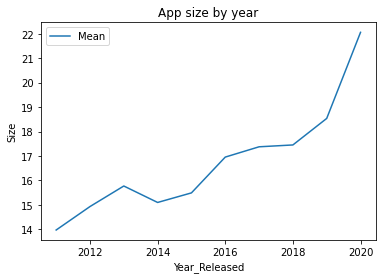

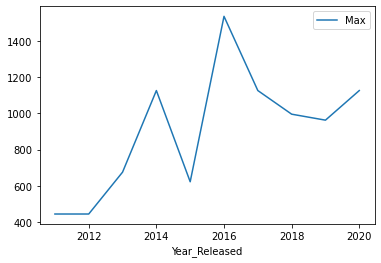

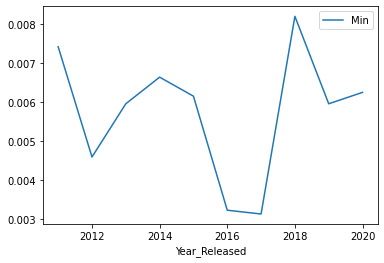

In [57]:
ax = plt.gca()
ax.set(title='App size by year', xlabel='Year', ylabel='Size')
app_sizes_mean.name = 'Mean'
app_sizes_max.name = 'Max'
app_sizes_min.name = 'Min'

app_sizes_mean.plot(legend='Mean')
plt.show()
app_sizes_max.plot(legend='Max')
plt.show()
app_sizes_min.plot(legend='Min')
plt.show()

**Nhận xét** : Ở biểu đồ 1 cho ta thấy được kích cỡ trung bình của app có xu hướng tăng theo từng năm điều này xác nhận nhận định rằng app đang ngày càng nặng. Mặc dù xu hướng này không phản ánh qua sự thay đổi của min và max kích cỡ app, nhưng điều này không ảnh hưởng gì đến nhận định trên.

### 4. Xu hướng app theo free hay tính phí?
Để trả lời câu hỏi này đối với nhà phát triển, thông tin này sẽ giúp dự đoán xu hướng app cho ta biết nên lựa chọn phương thức thanh toán thế nào để tối ưu hóa lợi nhuận cho ứng dụng của mình, hay tăng tính cạnh tranh của app trên thị trường.

Để trả lời câu hỏi này không cần phải thực hiện tiền xử lý dữ liệu vì nhóm đã thêm cột "Year_Released" để lấy năm của ngày phát hành ứng dụng ở bước trên. Tiếp theo, các bước thực hiện phân tích dữ liệu như sau:

- Bước 1: Tính toán và đánh giá xu hướng tăng hay giảm của số lượng ứng dụng cả miễn phí và tính phí
- Bước 2: Vẽ đồ thị gồm hai đường xu hướng cho hai kiểu ứng dụng 
- Bước 3: Tính toán tỉ lệ hai kiểu ứng dụng theo các năm
- Bước 4: Vẽ đồ thị cột cho tỉ lệ hai kiểu ứng dụng
- Bước 5: Mở rộng xu hướng này theo một giả định và thực hiện kiểm chứng các giả định này

**Phân tích dữ liệu**

**Bước 1**: Tính toán và đánh giá xu hướng tăng hay giảm của số lượng ứng dụng miễn phí và tính phí

Ở bước này, ta gom nhóm theo năm phát hành và kiểu loại ứng dụng miễn phí hay tính phí, loại bỏ 2 năm 2010 và 2021 như câu trên.

In [58]:
apps_by_year = gps_df.groupby(['Year_Released', 'Free'])['Year_Released'].agg('count')
apps_by_year = apps_by_year.loc[min_year+1:max_year-1]
apps_by_year

Year_Released  Free 
2011.0         False      2147
               True      12215
2012.0         False      2988
               True      22759
2013.0         False      3657
               True      38819
2014.0         False      4421
               True      67394
2015.0         False      4061
               True     111371
2016.0         False      4608
               True     162504
2017.0         False      4995
               True     254690
2018.0         False      5421
               True     329145
2019.0         False      5385
               True     475280
2020.0         False      5254
               True     539628
Name: Year_Released, dtype: int64

**Bước 2**: Vẽ đồ thị gồm hai đường xu hướng cho hai kiểu ứng dụng

Vẽ hai đường xu hướng cho các ứng dụng miễn phí và tính phí theo từng năm. Qua đó ta có thể đánh giá được sự thay đổi số lượng của từng kiểu ứng dụng.

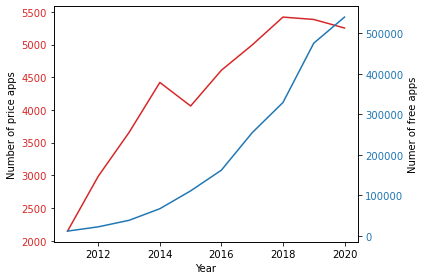

In [59]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of price apps')
ax1.plot(apps_by_year.loc[:, 0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Numer of free apps')
ax2.plot(apps_by_year.loc[:, 1], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

Ta có thể thấy xu hướng số lượng app của cả app miễn phí và app tính phí đều tăng. Ta sẽ đánh giá sự thay đổi về tỉ lệ của các app.

**Bước 3**: Tính toán tỉ lệ hai kiểu ứng dụng theo các năm

Gom nhóm và tính toán tỉ lệ phần trăm của ứng dụng free và tính phí.

In [68]:
apps_by_percents = apps_by_year.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
year_index = apps_by_year.index.get_level_values(0).unique()
apps_percents = {'ReleasedYear': year_index, 'Percents': apps_by_percents.loc[:, 0].values + apps_by_percents.loc[:, 1].values}
free_apps_percents = {'ReleasedYear': year_index, 'Percents': apps_by_percents.loc[:, 1].values}
print(free_apps_percents)

{'ReleasedYear': Float64Index([2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0,
              2019.0, 2020.0],
             dtype='float64', name='Year_Released'), 'Percents': array([85.05082858, 88.39476444, 91.39043224, 93.84390448, 96.48191143,
       97.24256786, 98.07651578, 98.3796919 , 98.87967711, 99.03575453])}


**Bước 4**: Vẽ đồ thị cột cho tỉ lệ hai kiểu ứng dụng

Sử dụng thư viện seaborn để vẽ đồ thị cột chồng, với phần cột phía trên màu xanh đậm tượng trưng cho các ứng dụng tính phí và phần cột dưới màu xanh nhạt tượng trưng cho các ứng dụng free.

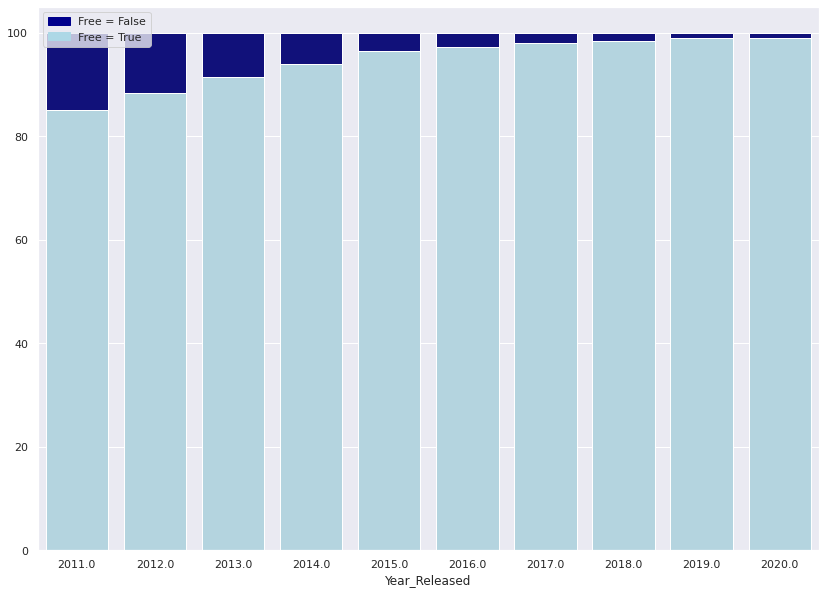

In [61]:
# set the figure size and background color
plt.figure(figsize=(14, 10))
sns.set(style="darkgrid")

bar1 = sns.barplot(x='ReleasedYear', y='Percents', data=apps_percents, color='darkblue')

bar2 = sns.barplot(x='ReleasedYear', y='Percents', data=free_apps_percents, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Free = False')
bottom_bar = mpatches.Patch(color='lightblue', label='Free = True')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

Ta dễ dàng đánh giá được xu hướng tỉ lệ các ứng dụng free ngày càng tăng và chiếm nhiều hơn trong số lượng app. Nhưng thị trường kinh doanh ứng dụng di động ngày càng lớn, nên có thể dự đoán rằng các kênh kiếm tiền phải của app phải chuyển qua các hình thức khác như sử dụng quảng cáo hay mua bán khi người dùng đang sử dụng app. Ta sẽ xem xét về tỉ lệ sử dụng ad và các thanh toán trong app để xác nhận nhận định này.

**Bước 5**: Mở rộng xu hướng này theo một giả định và thực hiện kiểm chứng các giả định này

Ta thực hiện gom nhóm trên các cột 'Year_Released', 'Free', 'Ad Supported' cho các ứng dụng miễn phí và tính phí có sử dụng quảng cáo, và các cột 'Year_Released', 'Free', 'In App Purchases' cho các ứng dụng miễn phí và tính phí có thực hiện giao dịch trong app. Sau đó lọc ra các ứng dụng miễn phí.

In [69]:
temp = gps_df.groupby(['Year_Released', 'Free', 'Ad Supported'])['App Id'].count()
num_ads_app_by_year = temp.loc[:, True, :].loc[min_year+1:max_year-1]
temp = gps_df.groupby(['Year_Released', 'Free', 'In App Purchases'])['App Id'].count()
num_in_purch_app_by_year = temp.loc[:, True, :].loc[min_year+1:max_year-1]
print('Thống kê số app free có để quảng cáo trong app')
print(num_ads_app_by_year)
print('Thống kê số app free có thực hiện mua bán trong app')
print(num_in_purch_app_by_year)

Thống kê số app free có để quảng cáo trong app
Year_Released  Ad Supported
2011.0         False             6104
               True              6111
2012.0         False            11759
               True             11000
2013.0         False            19735
               True             19084
2014.0         False            33824
               True             33570
2015.0         False            54790
               True             56581
2016.0         False            83993
               True             78511
2017.0         False           127020
               True            127670
2018.0         False           162574
               True            166571
2019.0         False           231571
               True            243709
2020.0         False           258632
               True            280996
Name: App Id, dtype: int64
Thống kê số app free có thực hiện mua bán trong app
Year_Released  In App Purchases
2011.0         False                10309
            

Vẽ đồ thị đường cho phần trăm của các app có chạy quảng cáo so với tổng số app free, và đường cho phần trăm của các app có thanh toán trong app so với tổng số app free để đánh giá nhận định rằng đang có xu hướng tăng trong các app có kênh kiếm tiền như thế này trong số các app free.

<AxesSubplot:xlabel='Year_Released', ylabel='Percent'>

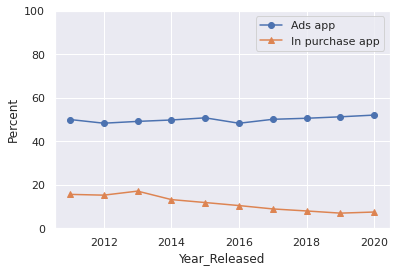

In [63]:
ads_apps_by_percents = num_ads_app_by_year.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
ads_apps_by_percents = ads_apps_by_percents.loc[:, True]
in_purch_apps_by_percents = num_in_purch_app_by_year.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
in_purch_apps_by_percents = in_purch_apps_by_percents.loc[:, True]

ads_apps_by_percents.name = 'Ads app'
in_purch_apps_by_percents.name = 'In purchase app'
plt.subplot()
ax = plt.gca()
ax.set_ylabel('Percent')
ax.set_ylim(0, 100)

ads_apps_by_percents.plot(marker='o', legend='Ads app')
in_purch_apps_by_percents.plot(marker='^', legend='In purchase app')

**Nhận xét** 
- Số app free có chạy quảng cáo cũng tăng đều theo từng năm vì phần trăm số app loại này dao động ổn định xung quanh mức 50%, mà ở bước 2 ta đã nhận định rằng số app free đang tăng mạnh theo từng năm.
- Số app free có thực hiện giao dịch thanh toán trong app vẫn tăng nhưng tỉ lệ so với không có thanh toán đang có xu hướng giảm dần theo từng năm. 

## Nhìn lại quá trình làm đồ án

### Thành viên: Nguyễn Đình Hoàng Phúc
#### Khó khăn

- "Nhầm lẫn" dataset: Sau khoảng thời gian đắn đo lựa chọn dữ liệu thì trong quá trình khám phá, teammate lại dùng Google để truy cập vào bộ dữ liệu thay vì nhấn vào link dữ liệu mà nhóm đã chốt trước. Điều này khiến mỗi thành viên làm một phiên bản khác nhau của bộ dữ liệu về Google Play, gây mất thời gian. Tuy nhiên đây cũng có thể là điều may mắn vì bộ dữ liệu mà teammate sử dụng được tạo gần đây hơn và có nhiều cột hơn để phân tích. Sau đó nhóm đã thống nhất lại chọn bộ dữ liệu mới được tạo gần hơn để sử dụng.
- Khi khám phá dữ liệu có nhiều format khác nhau và nhiều giá trị N/A. Không những thế với bộ dữ liệu cũ lúc đầu, còn bị tình trạng lẫn giá trị của các cột, cần phải quan sát bằng mắt, rồi dự đoán nhiều khi khám phá.
- Đặt và trả lời câu hỏi: em nghĩ đây là vấn đề nhiều nguời gặp phải. Rất khó để nghĩ ra một câu hỏi thú vị và nhiều lúc thể hiện từ dữ liệu không liên quan gì tới mình dự đoán và suy nghĩ.

### Những điều hữu ích học được
Qua đồ án này em cũng đã học được rất nhiều điều hữu ích:

- Bình tĩnh và cẩn trọng trong lúc khám phá dữ liệu. Dữ liệu trên các trang mà người khác thu thập có thể không rõ ràng, bị lỗi, thiếu nhiều chỗ. Cần tỉ mĩ quan sát để tránh thiếu sót.
- Hiểu rõ hơn về các thư viện mà mình ngỡ rằng đã nắm rõ. Các thư viện trong môn học em đã được làm quen từ trước, cứ ngỡ mình đã hiểu, nhưng sau môn học và đồ án em nhận thấy hiểu biết của mình còn hạn hẹp. Các thư viện được học rất hữu ích và "trí tuệ". Em sẽ dành nhiều thời gian hơn để mài dũa các công cụ sau môn học này.


### Thành viên: Lê Đặng Thiên Phúc
#### Khó khăn
- Trong giai đoạn lựa chọn dữ liệu, em đã nhầm lẫn vì có hai bộ dữ liệu có cùng tên 'Google Play Store Apps'. Tuy nhiên nhờ vậy mà nhóm đã tìm được bộ dữ liệu đầy đủ và up-to-date hơn với nhiều thuộc tính có thể sử dụng hơn.
- Trong quá trình lọc và tiền xử lý dữ liệu, có cột 'Size' xen lẫn nhiều nhiều kiểu dữ liệu khác nhau như 'G', 'k', 'M' hay là 'Varies with device' phải quan sát trực tiếp trên dữ liệu mới thấy được hay như cột 'Minimum Android' có cả hai kiểu format là '4.0 and up' hay là '4.0 - 5.0' ngoài ra còn có version android dành riêng cho các thiết bị wearable 4.4W không cùng format version android như các dòng khác. Những cột như thế này tốn khá nhiều thời gian để xử lý sạch sẽ, không bỏ sót. 

#### Những điều hữu ích học được
- Học được cách sử dụng các thư viện matplotlib và seaborn để vẽ các barchart, line chart, sử dụng thành thạo thư viện pandas.
- Em còn học được cách nhận định và đặt câu hỏi sao cho có ý nghĩa trong vai trò như người phân tích dữ liệu, chỉ ra được các xu hướng có lợi cho công việc kinh doanh hay cho dự án của mình sau này.

### Cả nhóm
#### Nếu có thêm thời gian thì làm gì?
- Khám phá và làm sạch dữ liệu kĩ càng hơn nữa.
- Đánh giá kỹ hơn về xu hướng chuyển dịch qua các kênh kiếm tiền khác của thị trường app mobile, trau chuốt lại code cho rõ ràng hơn.
- Đặt và trả lời những câu hỏi liên quan đến dữ liệu của các cột khác như `Rating`

## Tài liệu tham khảo

- https://matplotlib.org/3.5.1/index.html
- File tài liệu '13-FinalProject.pdf'
- Video các buổi học của thầy
- https://pandas.pydata.org/docs/
- https://ipywidgets.readthedocs.io/en/latest/index.html